In [ ]:
#camera calibration
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_calib.zip
!unzip data_object_calib.zip -d ./data_object_calib | grep "123"
!rm data_object_calib.zip

--2020-11-17 22:44:08--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_calib.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.72.155
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.72.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26854811 (26M) [application/zip]
Saving to: ‘data_object_calib.zip’

data_object_calib.z 100%[===================>]  25.61M  11.3MB/s    in 2.3s    

2020-11-17 22:44:11 (11.3 MB/s) - ‘data_object_calib.zip’ saved [26854811/26854811]

 extracting: ./data_object_calib/training/calib/001123.txt  
 extracting: ./data_object_calib/training/calib/001232.txt  
 extracting: ./data_object_calib/training/calib/001235.txt  
 extracting: ./data_object_calib/training/calib/007123.txt  
 extracting: ./data_object_calib/training/calib/001236.txt  
 extracting: ./data_object_calib/training/calib/003123.txt  
 extracting: ./data_object_calib/training/calib/001

In [ ]:
!wget  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_label_2.zip
!unzip data_object_label_2.zip -d ./data_object_label_2 | grep "123"
!rm data_object_label_2.zip 

--2020-11-17 22:44:12--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_label_2.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.74.72
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.74.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5601213 (5.3M) [application/zip]
Saving to: ‘data_object_label_2.zip’

data_object_label_2 100%[===================>]   5.34M  4.16MB/s    in 1.3s    

2020-11-17 22:44:14 (4.16 MB/s) - ‘data_object_label_2.zip’ saved [5601213/5601213]

 extracting: ./data_object_label_2/training/label_2/001123.txt  
 extracting: ./data_object_label_2/training/label_2/001232.txt  
 extracting: ./data_object_label_2/training/label_2/001235.txt  
 extracting: ./data_object_label_2/training/label_2/007123.txt  
 extracting: ./data_object_label_2/training/label_2/001236.txt  
 extracting: ./data_object_label_2/training/label_2/003123.txt  
 extracting: ./data_objec

In [ ]:
!wget  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_image_2.zip
!unzip data_object_image_2.zip -d ./data_object_image_2 | grep "123"
!rm data_object_image_2.zip

--2020-11-17 22:44:15--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_image_2.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.74.72
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.74.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12569945557 (12G) [application/zip]
Saving to: ‘data_object_image_2.zip’

data_object_image_2 100%[===================>]  11.71G  15.6MB/s    in 11m 57s 

2020-11-17 22:56:12 (16.7 MB/s) - ‘data_object_image_2.zip’ saved [12569945557/12569945557]

 extracting: ./data_object_image_2/training/image_2/001231.png  
 extracting: ./data_object_image_2/training/image_2/001230.png  
 extracting: ./data_object_image_2/training/image_2/001232.png  
 extracting: ./data_object_image_2/training/image_2/005123.png  
 extracting: ./data_object_image_2/training/image_2/001234.png  
 extracting: ./data_object_image_2/training/image_2/001237.png  
 extracting: .

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import os

from os import listdir
from os.path import isfile, join
import pandas as pd
from sklearn.model_selection import train_test_split
import gc; gc.enable() # memory is tight
import torch

dtype = "float32"

In [ ]:
# img_dir = 'kitti dataset/'
# ../input/kitti_single/training/label_2/
train_label_dir = './data_object_label_2/training/label_2/'
# label_test_image_dir = os.path.join(os.getcwd(), 'streets\\test\\labels\\')

train_image_dir = './data_object_image_2/training/image_2/'
# test_image_dir = os.path.join(os.getcwd(), 'streets\\test\\images\\')

train_calib_dir = './data_object_calib/training/calib/'

images =  [(train_image_dir+f) for f in listdir(train_image_dir) if isfile(join(train_image_dir, f))]
labels = [(train_label_dir+f) for f in listdir(train_label_dir) if isfile(join(train_label_dir, f))]
calibs = [(train_calib_dir+f) for f in listdir(train_calib_dir) if isfile(join(train_calib_dir, f))]

df = pd.DataFrame(np.column_stack([images, labels, calibs]), columns=['images', 'labels', 'calibs'])

In [ ]:
df

,images,labels,calibs
0,./data_object_image_2/training/image_2/000000.png,./data_object_label_2/training/label_2/000000.txt,./data_object_calib/training/calib/000000.txt
1,./data_object_image_2/training/image_2/000001.png,./data_object_label_2/training/label_2/000001.txt,./data_object_calib/training/calib/000001.txt
2,./data_object_image_2/training/image_2/000002.png,./data_object_label_2/training/label_2/000002.txt,./data_object_calib/training/calib/000002.txt
3,./data_object_image_2/training/image_2/000003.png,./data_object_label_2/training/label_2/000003.txt,./data_object_calib/training/calib/000003.txt
4,./data_object_image_2/training/image_2/000004.png,./data_object_label_2/training/label_2/000004.txt,./data_object_calib/training/calib/000004.txt
...,...,...,...
7476,./data_object_image_2/training/image_2/007476.png,./data_object_label_2/training/label_2/007476.txt,./data_object_calib/training/calib/007476.txt
7477,./data_object_image_2/training/image_2/007477.png,./data_object_label_2/training/label_2/007477.txt,./data_object_calib/training/calib/007477.txt
7478,./data_object_image_2/training/image_2/007478.png,./data_object_label_2/training/label_2/007478.txt,./data_object_calib/training/calib/007478.txt
7479,./data_object_image_2/training/image_2/007479.png,./data_object_label_2/training/label_2/007479.txt,./data_object_calib/training/calib/007479.txt


In [ ]:
df1 = df.sort_values(by='images')['images'].reset_index()
# df1 = df.sort_values(by='a')['a']
df2 = df.sort_values(by='labels')['labels'].reset_index()
# df2 = df.sort_values(by='b')['b']
df3 = df.sort_values(by='calibs')['calibs'].reset_index()

df['images'] = df1['images']
df['labels'] = df2['labels']
df['calibs'] = df3['calibs']
del df1, df2, df3
df

,images,labels,calibs
0,./data_object_image_2/training/image_2/000000.png,./data_object_label_2/training/label_2/000000.txt,./data_object_calib/training/calib/000000.txt
1,./data_object_image_2/training/image_2/000001.png,./data_object_label_2/training/label_2/000001.txt,./data_object_calib/training/calib/000001.txt
2,./data_object_image_2/training/image_2/000002.png,./data_object_label_2/training/label_2/000002.txt,./data_object_calib/training/calib/000002.txt
3,./data_object_image_2/training/image_2/000003.png,./data_object_label_2/training/label_2/000003.txt,./data_object_calib/training/calib/000003.txt
4,./data_object_image_2/training/image_2/000004.png,./data_object_label_2/training/label_2/000004.txt,./data_object_calib/training/calib/000004.txt
...,...,...,...
7476,./data_object_image_2/training/image_2/007476.png,./data_object_label_2/training/label_2/007476.txt,./data_object_calib/training/calib/007476.txt
7477,./data_object_image_2/training/image_2/007477.png,./data_object_label_2/training/label_2/007477.txt,./data_object_calib/training/calib/007477.txt
7478,./data_object_image_2/training/image_2/007478.png,./data_object_label_2/training/label_2/007478.txt,./data_object_calib/training/calib/007478.txt
7479,./data_object_image_2/training/image_2/007479.png,./data_object_label_2/training/label_2/007479.txt,./data_object_calib/training/calib/007479.txt


['./data_object_image_2/training/image_2/000039.png', './data_object_label_2/training/label_2/000039.txt', './data_object_calib/training/calib/000039.txt']
(375, 1242, 3)


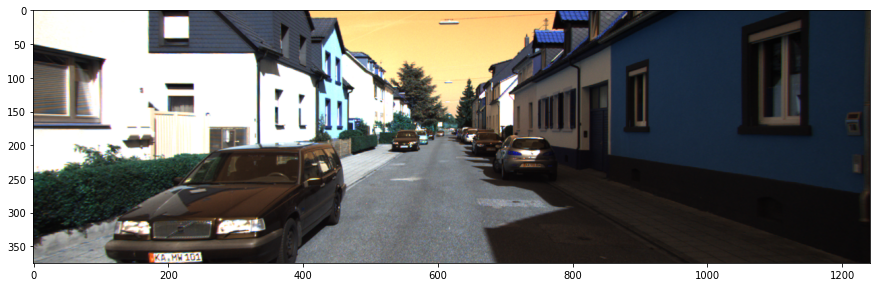

In [ ]:
df_in_list = (df).values.tolist()
im_idx = 39
print(df_in_list[im_idx])
image_path, label_path, cali_path = df_in_list[im_idx]
image_r = cv2.imread(image_path)

print(image_r.shape)

plt.figure(figsize=(15,10))
plt.imshow(image_r)
plt.show()



(6, 9, 4) (6, 4, 4) (6, 9, 2) (6, 4, 2)


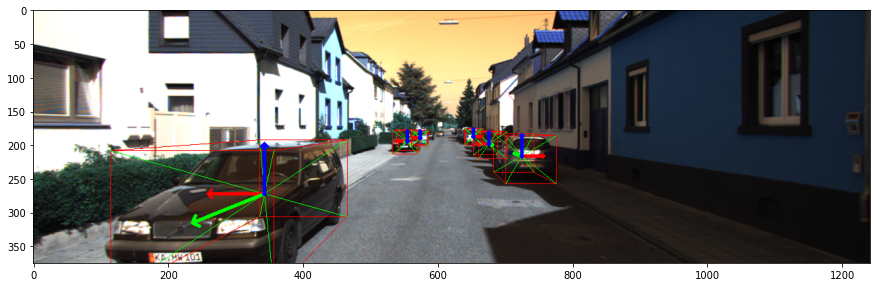

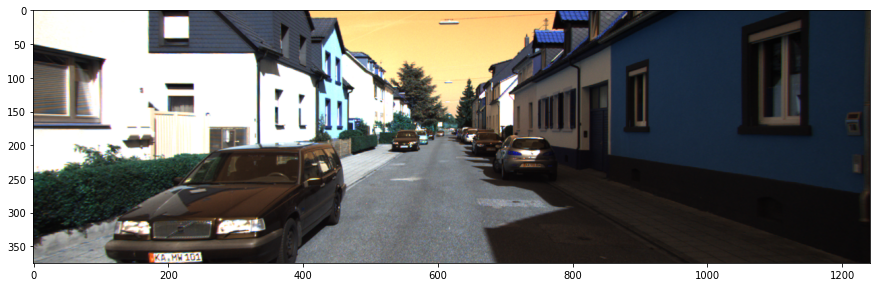

In [ ]:
def get_calibration_matrix(cali_path):
    with open(cali_path) as f:
      content = f.readlines()
    content = [x.split() for x in content] 
    cali_matrix = np.zeros((3,4),dtype="float32")
    for item in content:
      try:
        if item[0] == 'P2:':
          for i,  num in enumerate(item[1:]):
            cali_matrix[i//4,i %4]= num
      except:
        pass
    return cali_matrix

def get_label_info(label_path, cali_matrix, visualize = True):
    with open(label_path) as f:
            content = f.readlines()
    content = [x.split() for x in content]
    boxes = np.zeros((0, 9, 4), dtype = dtype)
    coords = np.zeros((0, 4, 4), dtype = dtype)
    pixel_loc_boxes = np.zeros((0, 9, 2), dtype = 'int32')
    pixel_loc_coords = np.zeros((0, 4, 2), dtype = 'int32')
    angles = []

    for item in content:
        if item[0]=='Car':
            ul_col, ul_row = int(float(item[4])), int(float(item[5]))
            lr_col, lr_row = int(float(item[6])), int(float(item[7]))
            h = float(item[8])
            w = float(item[9])/2
            l = float(item[10])/2
            center = np.array([float(item[11]), float(item[12]),float(item[13])], dtype="float32")
            angle = float(item[14])
            l_axis = np.array([np.cos(angle)* l, 0, -np.sin(angle) * l ], dtype = dtype)
            w_axis = -np.array([np.sin(angle)* w, 0, np.cos(angle) * w], dtype = dtype)
            h_axis = -np.array([0,h, 0], dtype = dtype)/2
            center += h_axis

            box = np.ones((12, 4), dtype= dtype)
            mul = [1, -1]

            box[8,:3] = center
            box[10,:3] = box[8,:3] + l_axis
            box[11,:3] = box[8,:3] + h_axis
            box[9,:3] = box[8,:3] + w_axis
            for i in range(2):
              for j in range(2):
                for k in range(2):
                  box[i * 4 + j * 2 + k,:3] = center + mul[i] * h_axis + mul[j] * l_axis + mul[k] * w_axis
            pixel_loc =np.dot(cali_matrix,box.transpose())
            pixel_loc = (pixel_loc[:2]/pixel_loc[2])
            pixel_loc = pixel_loc.astype(int)
            pixel_loc = pixel_loc.transpose()

            box = box.reshape(1, 12,4)
            coord = box[:,8:]
            box = box[:,0:9]
            pixel_loc = pixel_loc.reshape(1, 12,2)
            pixel_loc_box = pixel_loc[:,0:9]
            pixel_loc_coord = pixel_loc[:,8:]
            boxes = np.append(boxes, box, axis = 0)
            coords = np.append(coords, coord, axis = 0)
            pixel_loc_boxes = np.append(pixel_loc_boxes, pixel_loc_box, axis = 0)
            pixel_loc_coords = np.append(pixel_loc_coords, pixel_loc_coord, axis = 0)
            angles.append(angle)

    print(boxes.shape, coords.shape, pixel_loc_boxes.shape, pixel_loc_coords.shape)
    return np.array(angles), boxes, coords, pixel_loc_boxes, pixel_loc_coords


def visualize_label_info(image, pixel_loc_boxes, pixel_loc_coords):
    image_vis = image.copy()
    for i in range(pixel_loc_boxes.shape[0]):
      pixel_loc_box = pixel_loc_boxes[i:i + 1]
      pixel_loc_coord = pixel_loc_coords[i: i +1]
      image_vis = (cv2.polylines(image_vis,[pixel_loc_box[0][[0,1,3,2]],
                                        pixel_loc_box[0][[4,5,7,6]],
                                        pixel_loc_box[0][[0,1,5,4]],
                                        pixel_loc_box[0][[2,3,7,6]],], True,(255,0,0),1))
      image_vis = (cv2.polylines(image_vis,[pixel_loc_box[0][[3, 8,4]], 
                                        pixel_loc_box[0][[6, 8,1]],
                                        pixel_loc_box[0][[7, 8,0]],
                                        pixel_loc_box[0][[2, 8,5]],], False,(0,255,0),1))
      
      image_vis = (cv2.arrowedLine(image_vis,(pixel_loc_coord[0][0][0], pixel_loc_coord[0][0][1]), 
                                  (pixel_loc_coord[0][1][0], pixel_loc_coord[0][1][1]),(255,0,0),3))
      image_vis = (cv2.arrowedLine(image_vis,(pixel_loc_coord[0][0][0], pixel_loc_coord[0][0][1]), 
                                        (pixel_loc_coord[0][2][0], pixel_loc_coord[0][2][1]),(0,255,0),3))      
      image_vis = (cv2.arrowedLine(image_vis,(pixel_loc_coord[0][0][0], pixel_loc_coord[0][0][1]), 
                                  (pixel_loc_coord[0][3][0], pixel_loc_coord[0][3][1]),(0,0,255),3))         
      image_vis =  cv2.circle(image_vis, (pixel_loc_box[0][8][0], pixel_loc_box[0][8][1]), 2, (0,0,255), 2)
    return image_vis

cali_matrix = get_calibration_matrix(cali_path)


_,_,_,pixel_loc_boxes, pixel_loc_coords =  get_label_info(label_path, cali_matrix)

image_vis = visualize_label_info(image_r, pixel_loc_boxes, pixel_loc_coords)

fig = plt.figure(figsize=(15,10))
ax = fig.subplots(1)

ax.imshow(image_vis)

plt.show()


plt.figure(figsize=(15,10))
plt.imshow(image_r)
plt.show()




(375, 1242, 3)
(6, 9, 4) (6, 4, 4) (6, 9, 2) (6, 4, 2)


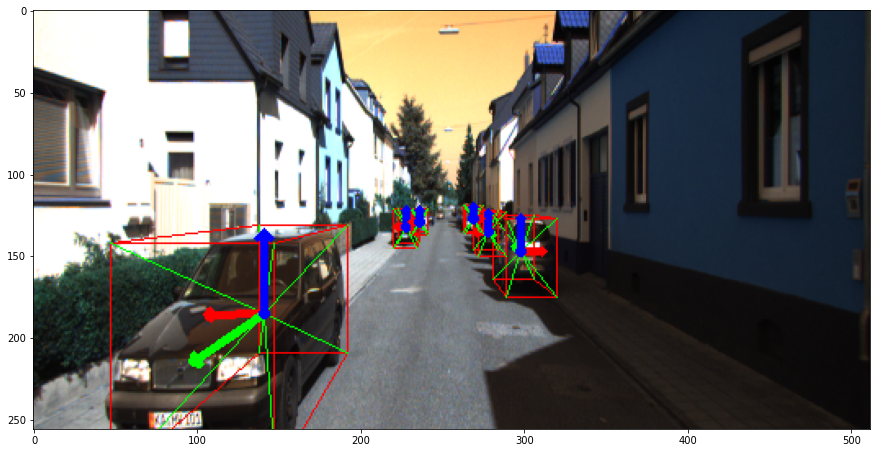

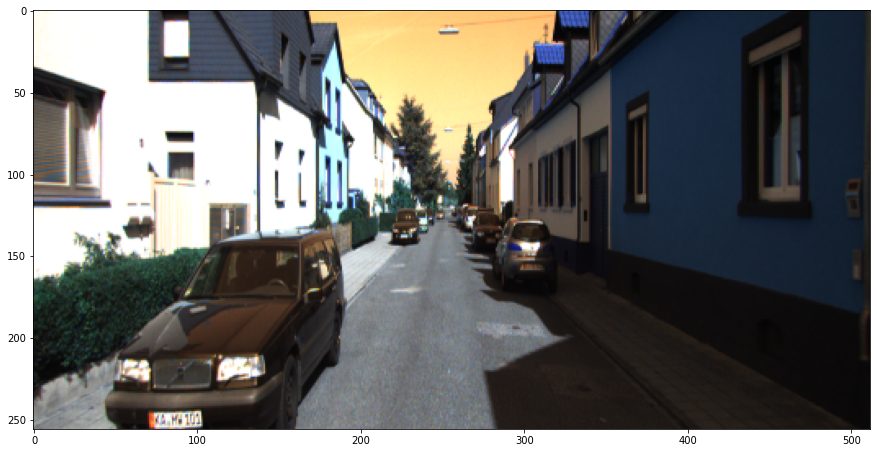

In [ ]:
print(image_r.shape)
orginal_imwidth = 1242
orginal_imheight = 375
resized_imwidth  = 512
resized_imheight = 256
image_resized = cv2.resize(image_r,(resized_imwidth, resized_imheight))

resized_cali_matrix = cali_matrix.copy()
resized_cali_matrix[0] *= resized_imwidth/orginal_imwidth
resized_cali_matrix[1] *= resized_imheight/orginal_imheight

_,_,_,pixel_loc_boxes, pixel_loc_coords =  get_label_info(label_path, resized_cali_matrix)


image_vis = visualize_label_info(image_resized, pixel_loc_boxes, pixel_loc_coords)

fig = plt.figure(figsize=(15,10))
ax = fig.subplots(1)
ax.imshow(image_vis)
plt.show()

plt.figure(figsize=(15,10))
plt.imshow(image_resized)
plt.show()

In [ ]:
df_in_list = (df).values.tolist()
im_idx = 612
print(df_in_list[im_idx])
image_path, label_path, cali_path = df_in_list[im_idx]
image_r = cv2.imread(image_path)

print(image_r.shape)

plt.figure(figsize=(15,10))
plt.imshow(image_r)
plt.show()
cali_matrix = get_calibration_matrix(cali_path)


_,_,_,pixel_loc_boxes, pixel_loc_coords =  get_label_info(label_path, cali_matrix)

image_vis = visualize_label_info(image_r, pixel_loc_boxes, pixel_loc_coords)

fig = plt.figure(figsize=(15,10))
ax = fig.subplots(1)

ax.imshow(image_vis)

plt.show()

orginal_imwidth = 1242
orginal_imheight = 375
resized_imwidth  = 512
resized_imheight = 256
image_resized = cv2.resize(image_r,(resized_imwidth, resized_imheight))
resized_cali_matrix = cali_matrix.copy()
resized_cali_matrix[0] *= resized_imwidth/orginal_imwidth
resized_cali_matrix[1] *= resized_imheight/orginal_imheight

_,_,_,pixel_loc_boxes, pixel_loc_coords =  get_label_info(label_path, resized_cali_matrix)


image_vis = visualize_label_info(image_resized, pixel_loc_boxes, pixel_loc_coords)

plt.figure(figsize=(15,10))
plt.imshow(image_resized)
plt.show()

fig = plt.figure(figsize=(15,10))
ax = fig.subplots(1)
ax.imshow(image_vis)
plt.show()
